## Community Detection via Spectral Bi-clustering
Prepared by: Norbert Paul R. Gerena

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import SpectralBiclustering

### What is Spectral Biclustering?

Biclustering algorithms simultaneously cluster rows and columns of a data matrix. These clusters of rows and columns are known as biclusters. Each determines a submatrix of the original data matrix with some desired properties. For more info, read sklearn's [documentation](https://scikit-learn.org/stable/modules/biclustering.html).

Here's a sample matrix.

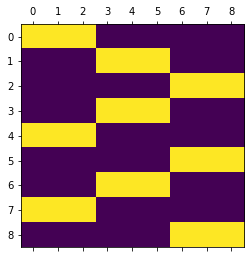

In [102]:
#create a random matrix
sample = np.array([[1,1,1,0,0,0,0,0,0],
                   [0,0,0,1,1,1,0,0,0],
                   [0,0,0,0,0,0,1,1,1], 
                   [0,0,0,1,1,1,0,0,0],
                   [1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1],
                   [0,0,0,1,1,1,0,0,0],
                   [1,1,1,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1]])

plt.matshow(sample);

After applying biclustering, this will be the result.

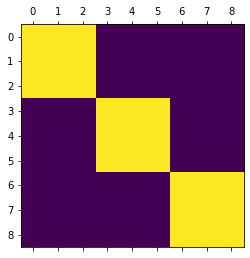

In [108]:
bicluster = SpectralBiclustering(n_clusters=3)
bicluster.fit(sample)

plt.matshow(sample[np.argsort(bicluster.row_labels_),:] 
                 [:,np.argsort(bicluster.column_labels_)]);

The three clusters are the 3 yellow squares. Biclustering algo clusters the rows as well as the columns.

### Community Detection

Here's a simple network with 2 communities.

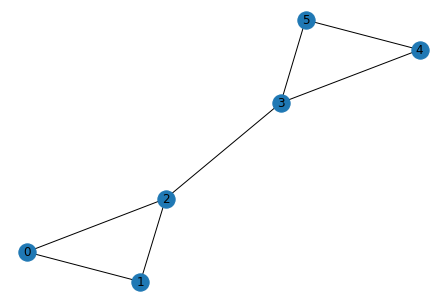

In [7]:
adj_mat = np.array([[0, 1, 1, 0, 0, 0], 
                    [1, 0, 1, 0, 0, 0], 
                    [1, 1, 0, 1, 0, 0],
                    [0, 0, 1, 0, 1, 1],
                    [0, 0, 0, 1, 0, 1],
                    [0, 0, 0, 1, 1, 0]])

G = nx.from_numpy_array(adj_mat)
nx.draw(G, with_labels=True)

The adjacency matrix below looks similar to the biclusters discussed earlier. However, the diagonals are all zeroes since there are no self-loops. For the biclsutering to work, we have to fill the diagonals with 1. I've tried to cluster an adjacency matrix without filling in the diagonals but it did not work well.

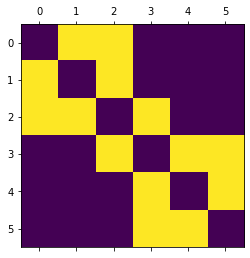

In [109]:
plt.matshow(adj_mat);

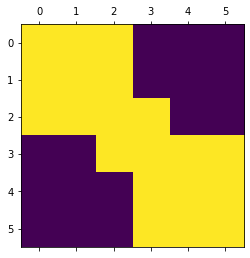

In [110]:
#fill the diagonals with one
np.fill_diagonal(adj_mat, 1)
plt.matshow(adj_mat);

It's now looking more like a bicluster. However, there are overlaps for the two biclusters (3x3 yellow squares) above. In particular, positions (2,3) and (3,2), which make sense since nodes 2 and 3 are the nodes that connect the two communities.

### Karate Club

Let's cluster the karate club  network via Biclustering.

Here's the original adjacency matrix with the diagonal filled with 1s.

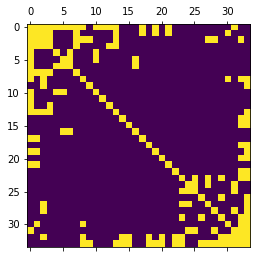

In [112]:
K = nx.karate_club_graph()
karate = nx.to_numpy_array(K)
#fill the diagonal with 1
np.fill_diagonal(karate, 1)
plt.matshow(karate);

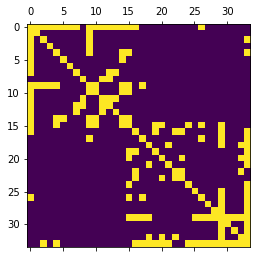

In [120]:
#perform biclustering
bicluster = SpectralBiclustering(n_clusters=2)
bicluster.fit(karate)

plt.matshow(karate[np.argsort(bicluster.row_labels_),:] 
                 [:,np.argsort(bicluster.column_labels_)]);

You can imagine two diagonal squares above which correspond to the 2 communities. The "spots" outside the two squares are actually the "bridges". Take note that the two squares will be perfectly filled only if the nodes in a community are fully connected.

In [121]:
#create a color map
color = []
for label in bicluster.row_labels_:
    if label:
        color.append('red')
    else:
        color.append('blue')

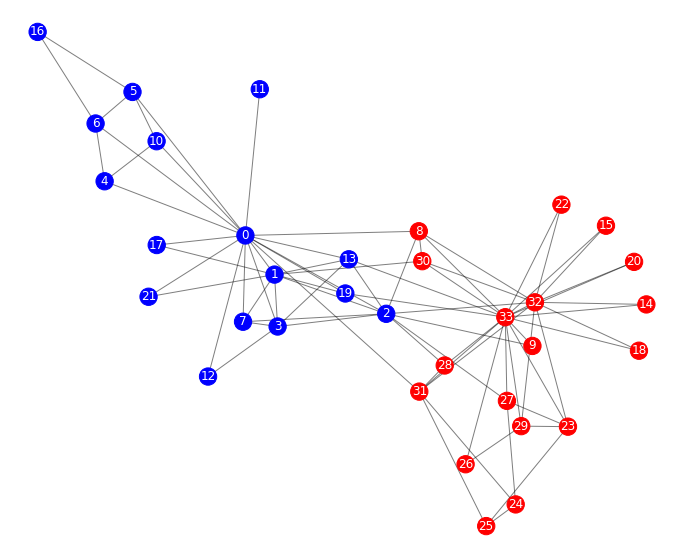

In [128]:
pos = nx.fruchterman_reingold_layout(K);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=300, node_color=color);
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.show();

The problem with Biclustering is that we need to specify the number of clusters. In case that we do not know it, we perform clustering for different numbers of clusters/communities then choose the best one using a metric such as average modularity.